##Importing Required Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.shape

(2938, 22)

We have 22 column with target column Life Expentancy and we have 2938 examples. Now let's check the unique values of our dataset.

In [9]:
for i in data.columns:
    unique_values = np.unique(data[i])
    print(i)
    print(unique_values)

Country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Repub

In [10]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Data Cleaning**

The string values for the columns/variables are not very 'clean' so we will make them better first.

In [13]:
# Renaming some column names as they contain trailing spaces.
df= data.rename(columns={"Country": "country", "Year": "year", "Status": "status", "Life expectancy ":"life_expectancy",	
                         "Adult Mortality": "adult_mortality", "infant deaths":"infant_deaths", "Alcohol": "alcohol", 
                         "percentage expenditure": "percentage_expenditure",	"Hepatitis B": "hepatitisb", "Measles ": "measles",	
                         " BMI ": "bmi", "under-five deaths ": "under_five_deaths", "Polio": "polio", "Total expenditure": "total_expenditure", 
                         "Diphtheria ": "diptheria",	" HIV/AIDS": "hiv/aids", "GDP":"gdp", "Population":"population", 
                         " thinness  1-19 years": "thinness_10to19_years", " thinness 5-9 years": "thinness_5to9_years", 
                         "Income composition of resources":"income_comp_of_resources", "Schooling":"schooling"})
 

In [14]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Since we have done with clearing column names now we will check for duplicated rows and see if there is any.

In [15]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 22)


There is no duplicated rows. So we can move on.


**Missing Values**

In [55]:
#Finding missing values and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis = 1, keys = ['total_missing', 'percent_missing'])
missing_values.head(15)

,total_missing,percent_missing
status,0,0.0
country_Kenya,0,0.0
country_Finland,0,0.0
country_Fiji,0,0.0
country_Ethiopia,0,0.0
country_Estonia,0,0.0
country_Eritrea,0,0.0
country_Equatorial Guinea,0,0.0
country_El Salvador,0,0.0
country_Egypt,0,0.0


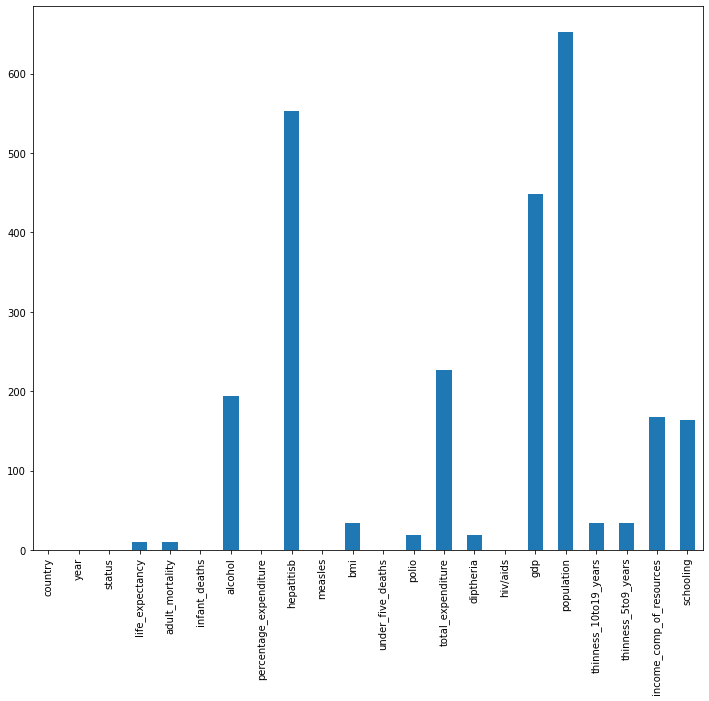

In [17]:
#visualization of Missing Values
plt.figure(figsize=(12,10))
df.isnull().sum().plot(kind='bar')

There are many columns with null values but the amount of missing values is not big enough to drop the columns.So, we will be filling them.

In [18]:
for column in missing_values.index[:15]:
    df[column].fillna(df[column].median(), inplace=True)

In [19]:
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_expenditure      0
hepatitisb                  0
measles                     0
bmi                         0
under_five_deaths           0
polio                       0
total_expenditure           0
diptheria                   0
hiv/aids                    0
gdp                         0
population                  0
thinness_10to19_years       0
thinness_5to9_years         0
income_comp_of_resources    0
schooling                   0
dtype: int64

**Exploratory Data Analysis**


In [20]:
numerical_columns= df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

In [21]:
numerical_columns

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [22]:
categorical_columns

,country,status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


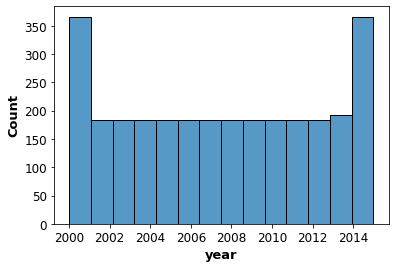

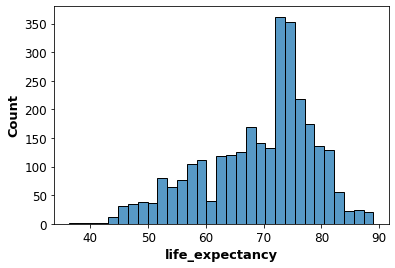

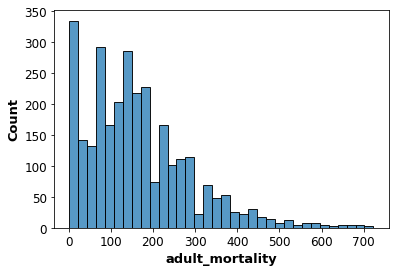

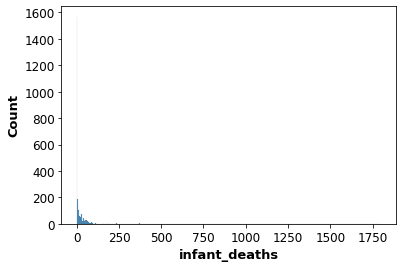

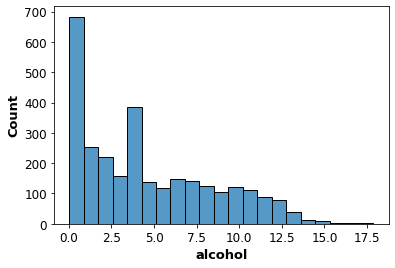

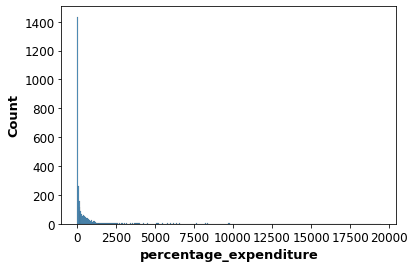

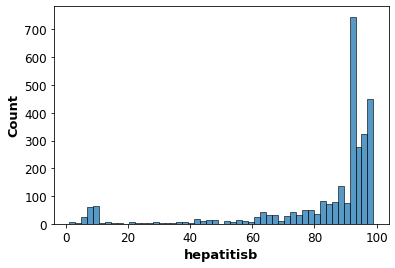

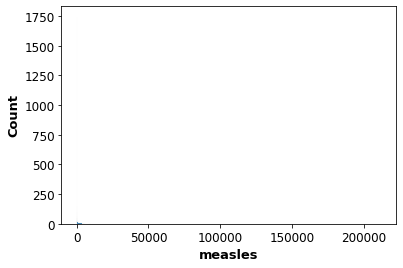

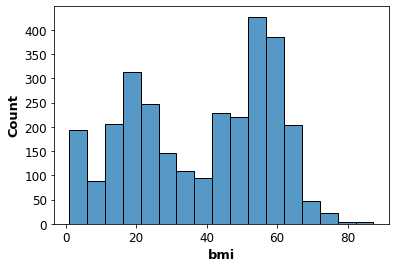

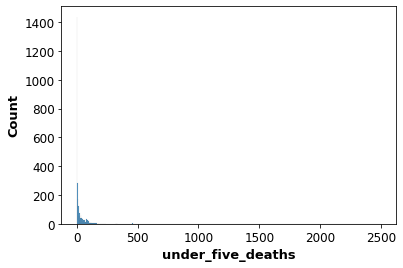

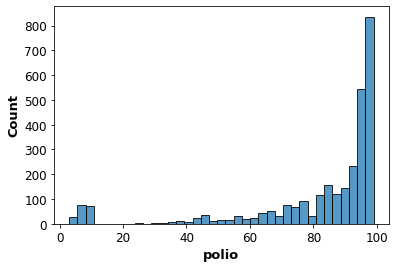

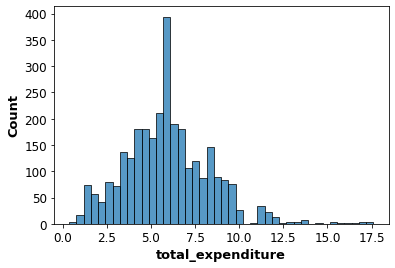

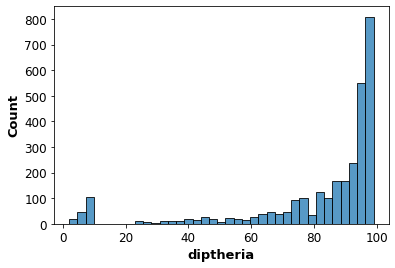

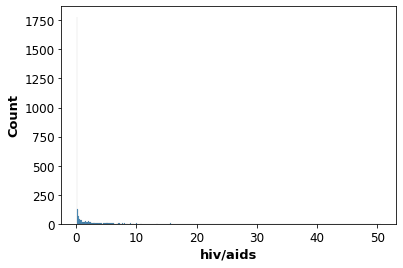

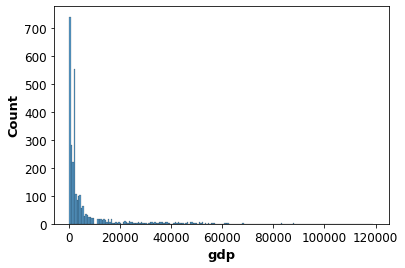

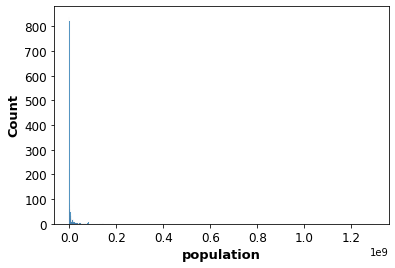

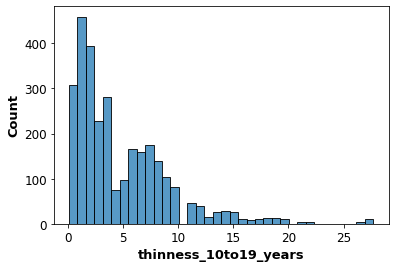

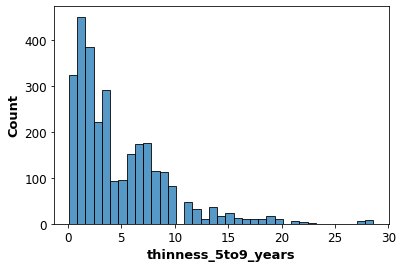

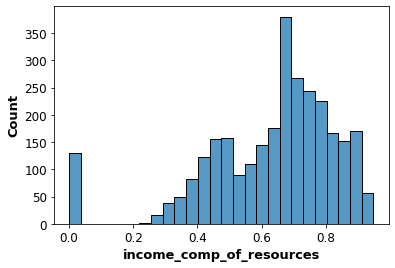

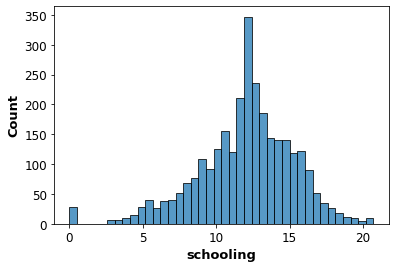

In [23]:
#Histplot of Features
for feature in numerical_columns.columns:
    sns.histplot(x =numerical_columns[feature])
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Count", fontsize= 13, fontweight="bold")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

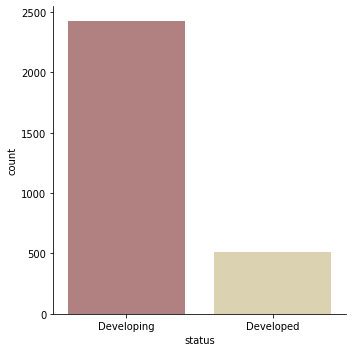

In [24]:
#Catplot for Categorical Column Status
sns.catplot(x="status", kind="count", palette="pink", data=categorical_columns)

**Comparing Life Expectancy With Other Features**


In [25]:
high_life_expectancy = df.sort_values('life_expectancy', ascending = False).head(10)
high_life_expectancy

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
1850,New Zealand,2010,Developed,89.0,71.0,0,9.62,6664.148708,9.0,43,64.8,0,93.0,11.20,93.0,0.1,33691.34837,1386542.0,0.3,0.3,0.899,20.3
915,Finland,2014,Developing,89.0,78.0,0,8.80,6164.455402,92.0,0,61.7,0,98.0,9.68,98.0,0.1,49914.61864,5461512.0,0.9,0.8,0.890,17.0
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,63.4,1,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,61.7,2,96.0,8.36,96.0,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
2513,Sweden,2007,Developed,89.0,63.0,0,6.90,7593.391622,92.0,1,56.1,0,98.0,8.92,98.0,0.1,53324.37937,914892.0,1.3,1.3,0.895,15.8
995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,61.9,3,94.0,11.30,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.920,17.0
1916,Norway,2009,Developed,89.0,67.0,0,6.68,142.374943,92.0,2,58.5,0,94.0,9.49,94.0,0.1,817.77681,4828726.0,0.7,0.7,0.936,17.4
2056,Portugal,2014,Developed,89.0,78.0,0,9.88,271.254553,98.0,0,6.9,0,98.0,9.50,98.0,0.1,2277.53613,14162.0,0.7,0.5,0.837,16.8
1293,Italy,2004,Developed,89.0,66.0,2,8.98,4270.914882,96.0,599,57.6,3,97.0,8.49,94.0,0.1,31174.56118,57685327.0,0.5,0.5,0.846,15.6
937,France,2008,Developing,89.0,88.0,3,11.90,7002.785925,47.0,604,59.1,3,98.0,1.57,98.0,0.1,45413.65710,6437499.0,0.6,0.6,0.877,16.1


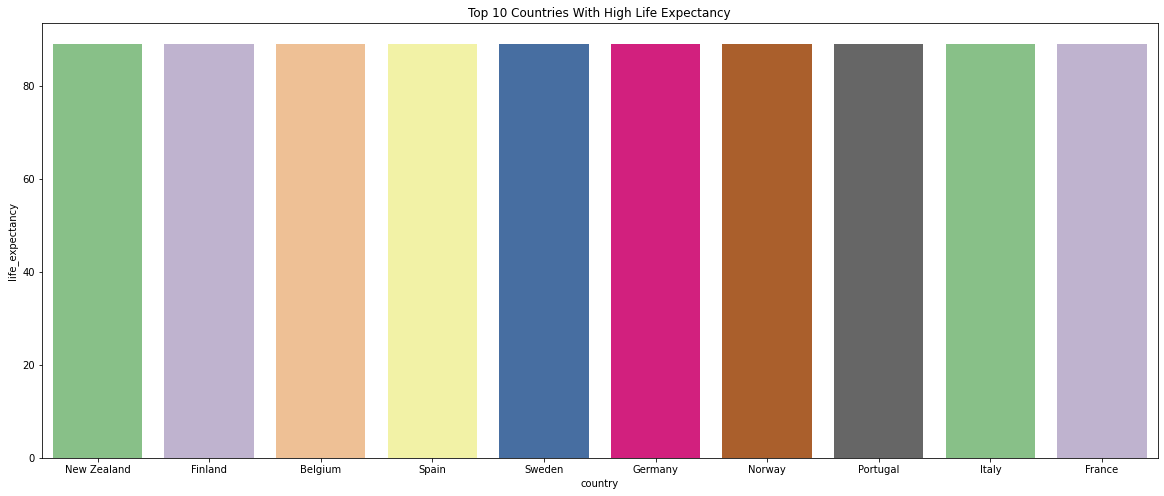

In [26]:
#Top 10 Countries with high life expectancy
plt.figure(figsize=(20,8))
plt.title("Top 10 Countries With High Life Expectancy")
sns.barplot(high_life_expectancy['country'], high_life_expectancy['life_expectancy'], palette='Accent')

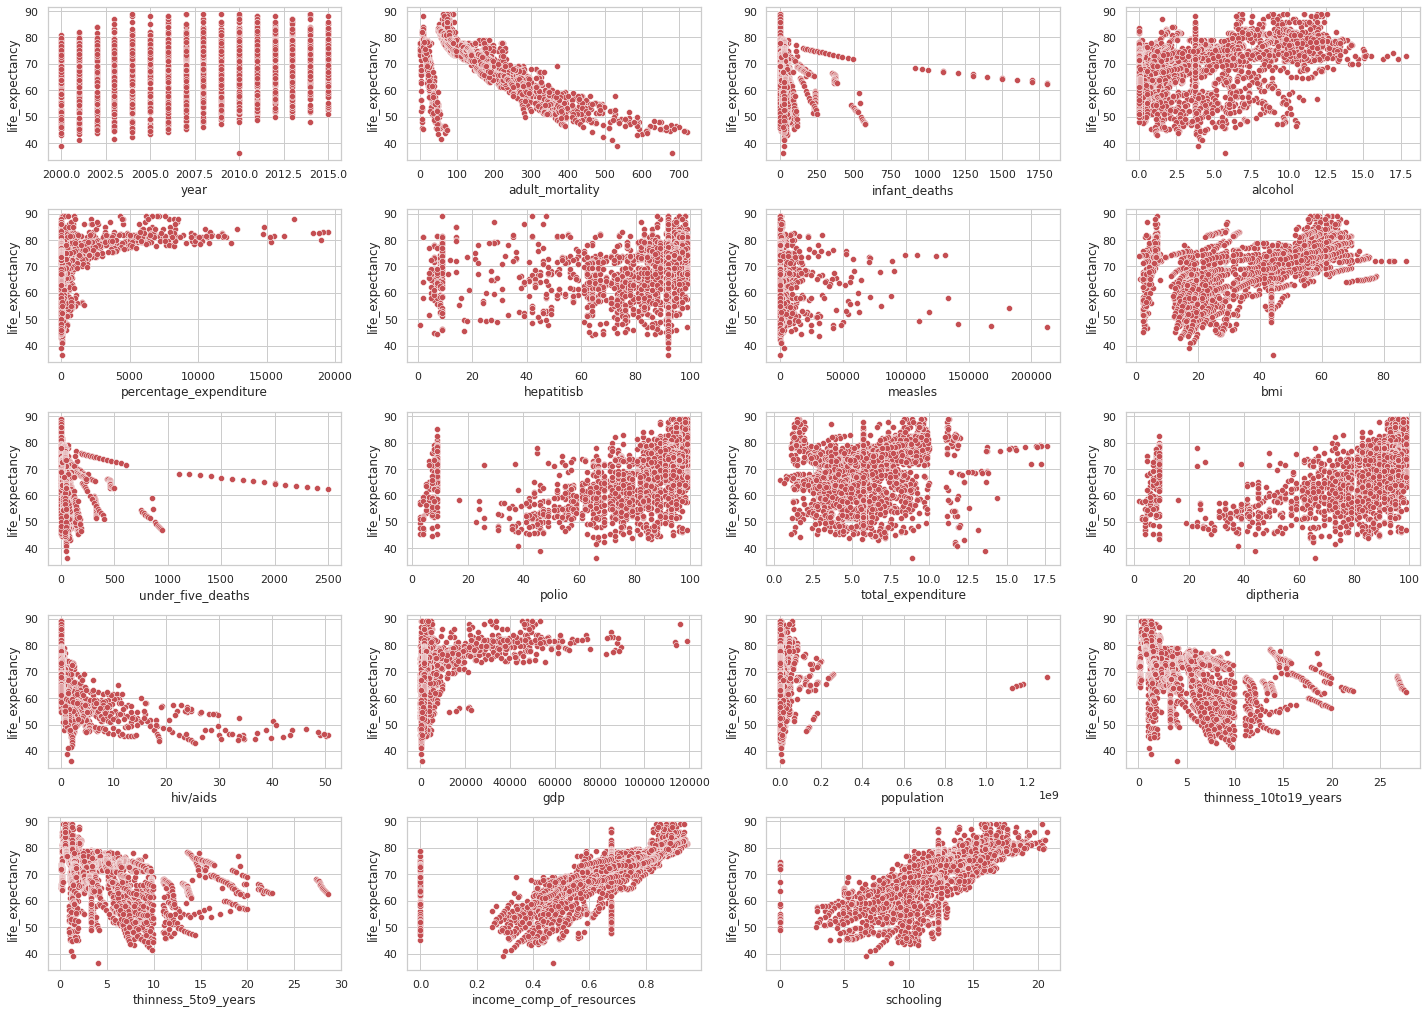

In [27]:
#Scatter Plot for understanding the relationship between of life expectancy and other features
new_numerical = numerical_columns.drop(['life_expectancy'], axis=1);
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(new_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(new_numerical.iloc[:,i], df['life_expectancy'],color='r')
plt.tight_layout()

**Checking For Outliers**

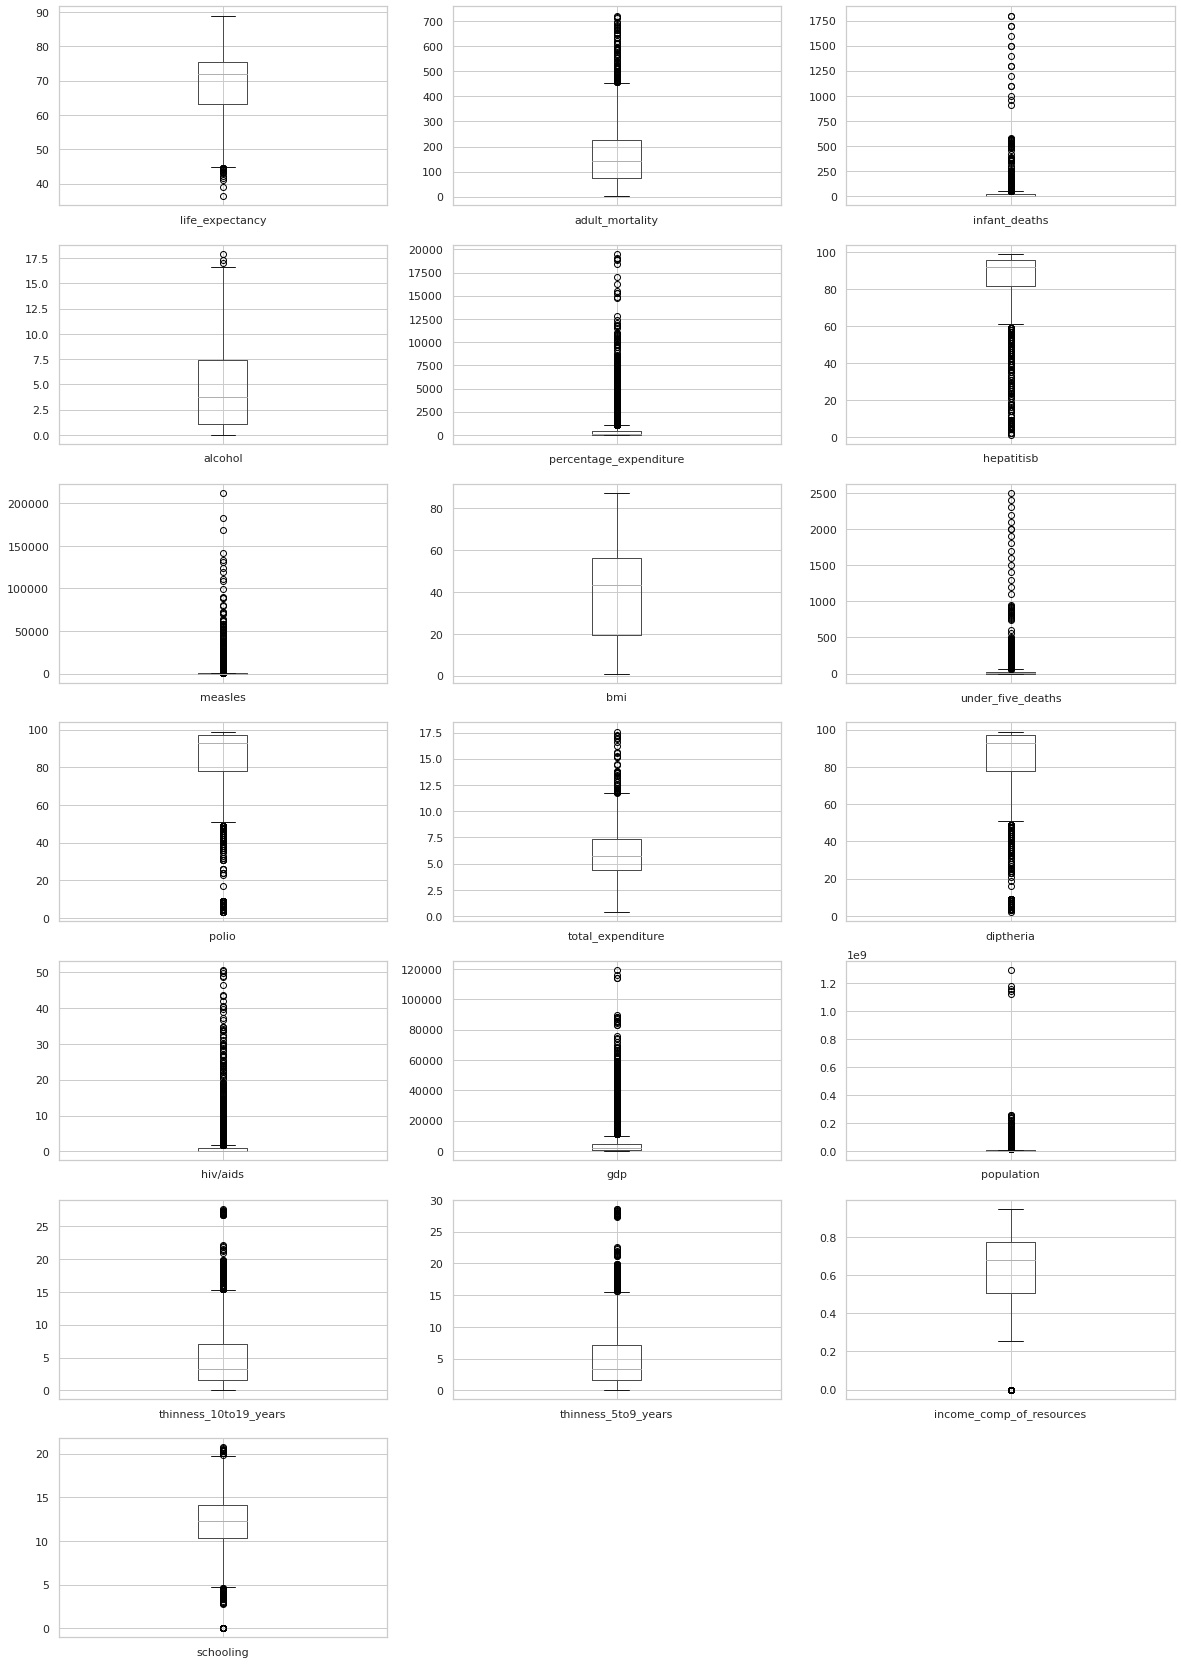

In [28]:
#Checking Outliers with Boxplot
plt.figure(figsize=(20,30))
for i,col in enumerate(['life_expectancy','adult_mortality','infant_deaths','alcohol','percentage_expenditure','hepatitisb','measles','bmi','under_five_deaths','polio','total_expenditure', 'diptheria','hiv/aids','gdp','population','thinness_10to19_years','thinness_5to9_years','income_comp_of_resources','schooling'],start=1):
                       plt.subplot(7, 3, i)
                       df.boxplot(col)


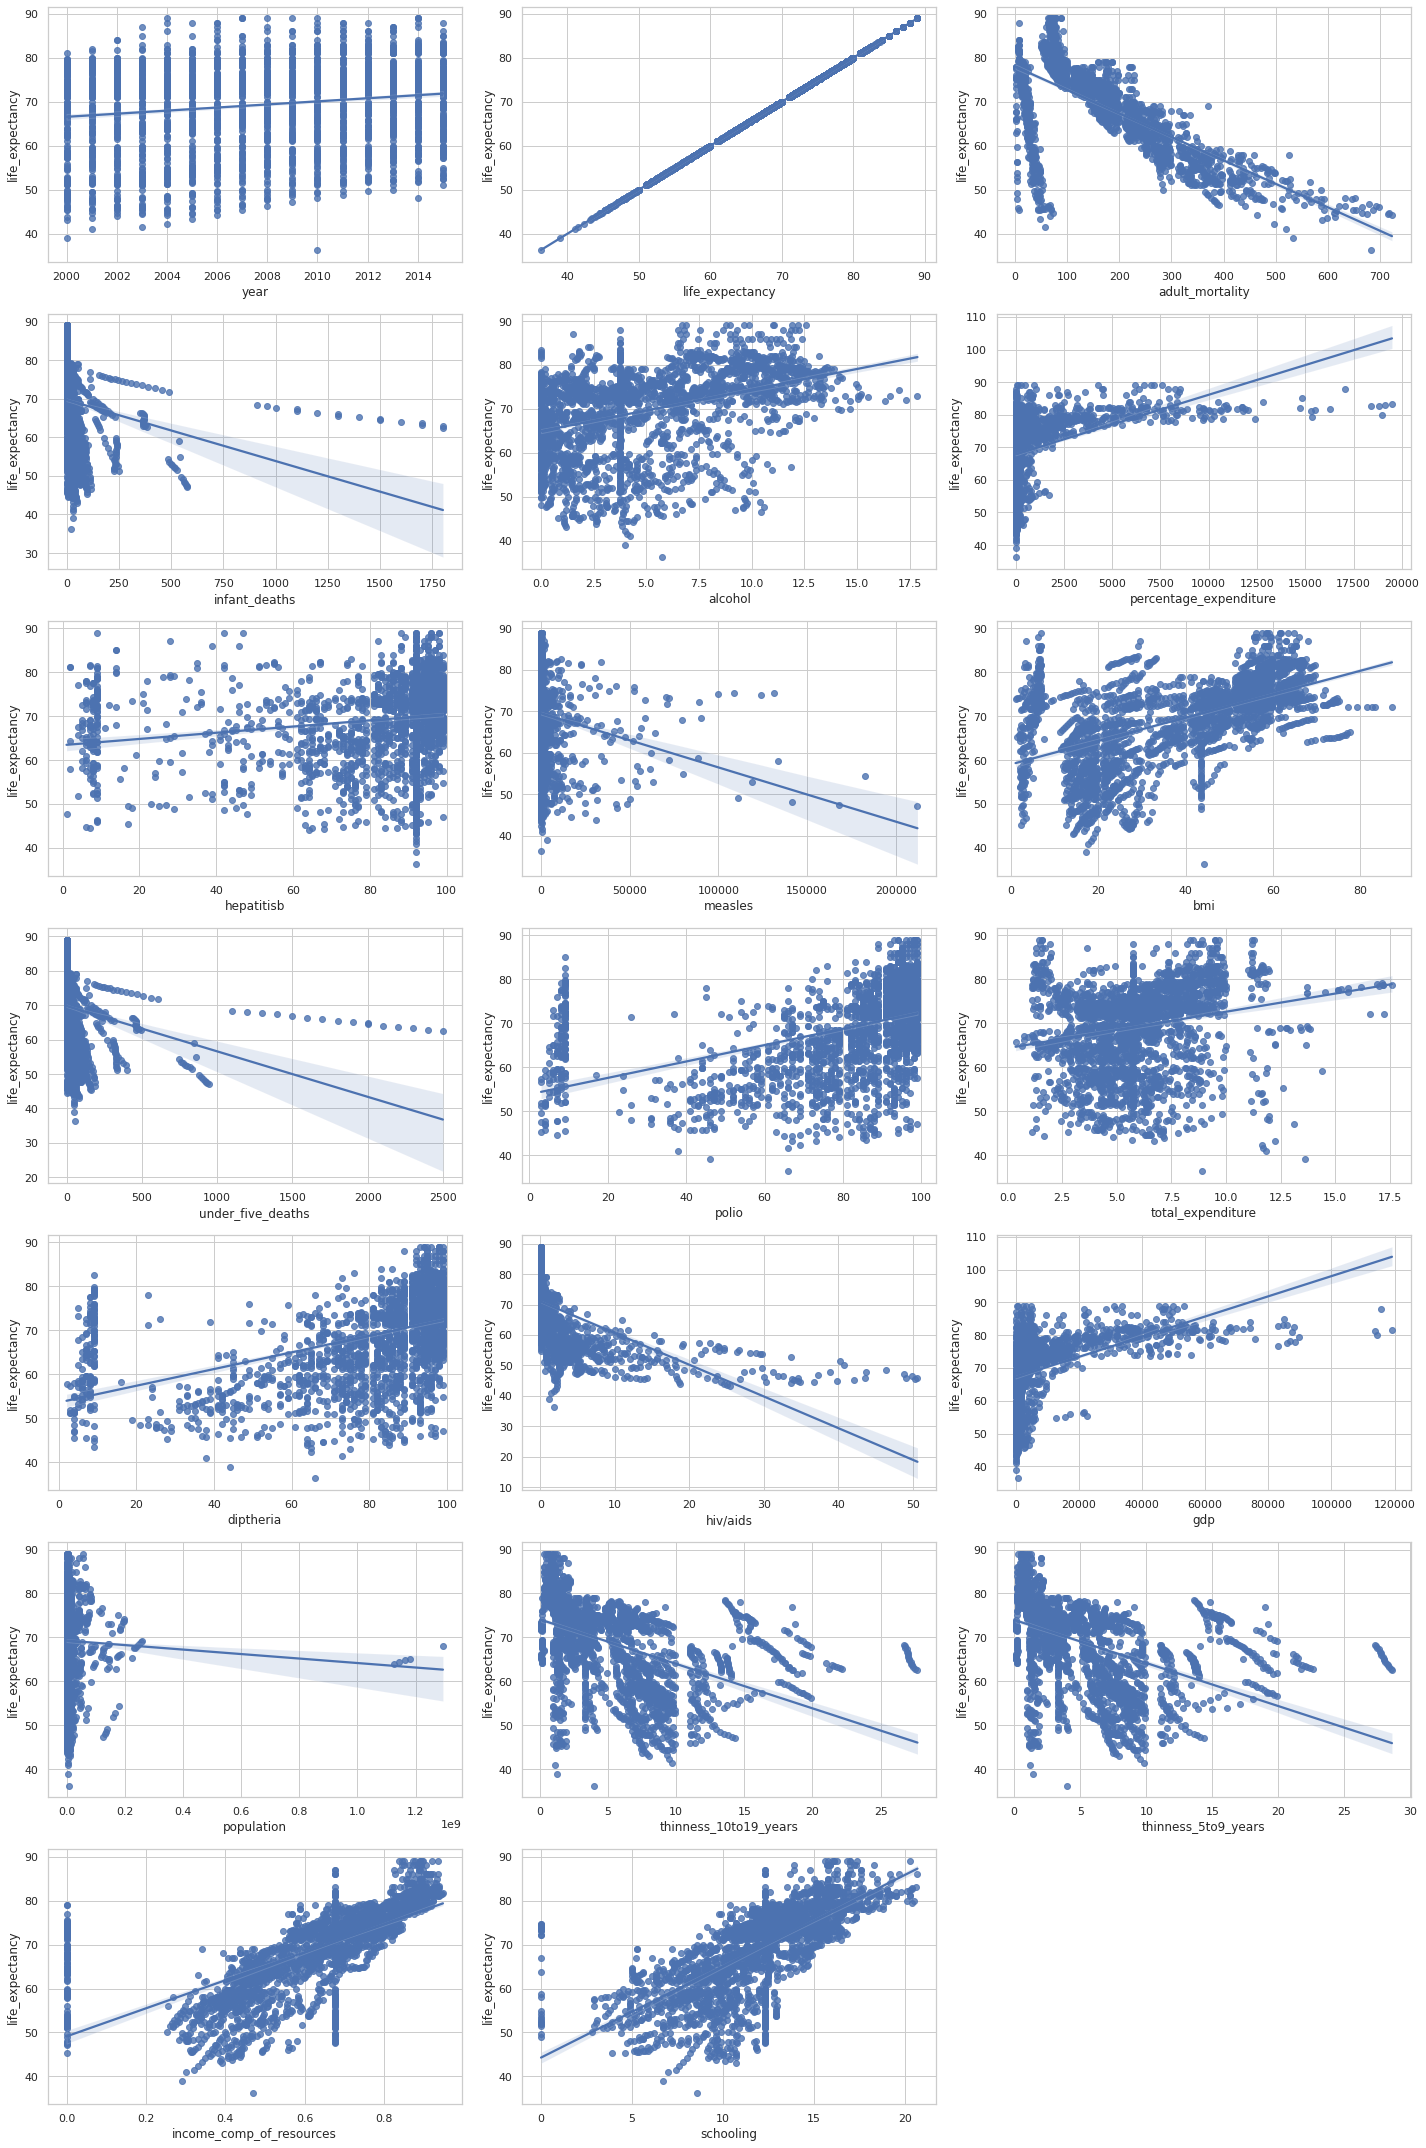

In [29]:
#Regplot for Outliers
fig = plt.figure(figsize = (20,30))
for i in range(len(numerical_columns.columns)):
    fig.add_subplot(7, 3, i+1)
    sns.regplot(numerical_columns.iloc[:,i], numerical_columns['life_expectancy'])
plt.tight_layout()

There are a lot of outliers for all of these variables as it can be shown visually. But we will let them stay now.

**Correlation**


In [30]:
#checking the correlation to get the relationship between the different features 
corelation = df.corr()
corelation

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,gdp,population,thinness_10to19_years,thinness_5to9_years,income_comp_of_resources,schooling
year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
life_expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
adult_mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant_deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage_expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
hepatitisb,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
bmi,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under_five_deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


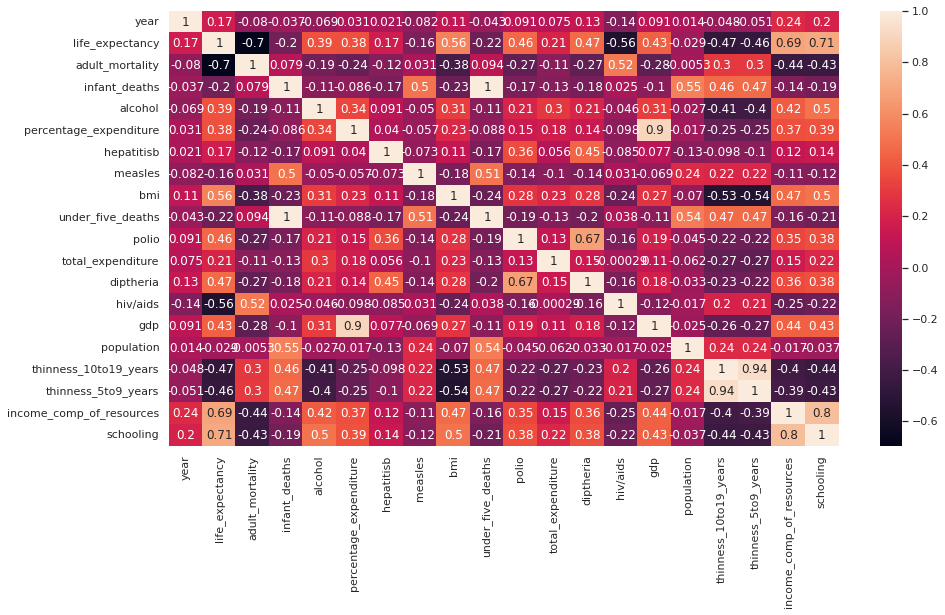

In [31]:
#Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

4 pairs of features have high correlation



*  Infant_Deaths and Under_Five_Deaths
*  Percentage_Expenditure and GDP
*  Thinness_10_19 years and thinness_5_9 years
*  Income_composition_of_resources and Schooling

When independent features are highly correlated i.e. have same nature, then they introduce the element of variance in the model which is called Multi-Collinearity. Multi-Collinearity is not good for our models so we will be dropping these columns to avoid that.








In [32]:
df = df.drop(['thinness_5to9_years','gdp','infant_deaths'],axis=1)

**Label** **Encoding**

Categorical data has two types: nominal and ordinal. Nominal variable is like countries, or gender, where there are no order assigned for each type. For ordinal, each value represents a specific level. For example, educational level has levels such as primary school, junior high school, high school, bachelor degree, master degree and so on.


**One-Hot Encoding (Nominal)**



In [33]:
nominal_df = df[['country']]
nominal_df.head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [34]:
nominal_df = pd.get_dummies(data=nominal_df, drop_first=True)
nominal_df.head()

,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,...,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Add nominal_df
df.drop(['country'],axis = 1, inplace= True)
df = df.join(nominal_df)
df.head()

,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,population,thinness_10to19_years,income_comp_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,...,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#Dropping one column to avoid Multi-Collinearity.
df.drop(['country_Zimbabwe'], axis=1, inplace=True)
df.head()

,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,population,thinness_10to19_years,income_comp_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,...,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia
0,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Ordinal Encoding**

In [37]:
from sklearn.preprocessing import LabelEncoder
ordinal_df= df[['status']]
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,status
0,1
1,1
2,1
3,1
4,1


In [38]:
#Add ordinal_df
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,year,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,population,thinness_10to19_years,income_comp_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,...,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,status
0,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
df.head()

,year,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitisb,measles,bmi,under_five_deaths,polio,total_expenditure,diptheria,hiv/aids,population,thinness_10to19_years,income_comp_of_resources,schooling,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bolivia (Plurinational State of),country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,...,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_The former Yugoslav republic of Macedonia,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom of Great Britain and Northern Ireland,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,status
0,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


 **Feature Scaling**

As seen previosly, our dataset contains outliers and we did not remove or replace them. Outliers can skew a probability distribution and make data scaling using standardization difficult as the calculated mean and standard deviation will be skewed by the presence of the outliers.Therefore, we choose RobustScaler for our Feature scaling.  

RobustScaler approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.



In [41]:
from sklearn.preprocessing import RobustScaler

for feature in df.columns:
    scaler = RobustScaler()
    df[[feature]]= scaler.fit_transform(df[[feature]])

**Train** **Test** **Split**

In [42]:
Y = df['life_expectancy']
X = df.drop(['life_expectancy'],axis=1)


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42)


## MODELS

In [44]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



**Lasso Model**

In [45]:
#LassoModel
lasso_reg = Lasso(alpha=0.0000001)
lasso_reg.fit(X_train,Y_train)

#Make Predictions
lasso_reg_testpred = lasso_reg.predict(X_test)
lasso_reg_trainpred = lasso_reg.predict(X_train)

#Calculating MSE and RMSE
lasso_train_mse = round(mean_squared_error(Y_train, lasso_reg_trainpred),4)
lasso_train_mae = round(mean_absolute_error(Y_train, lasso_reg_trainpred),4)
lasso_train_R2 = round(r2_score(Y_train,  lasso_reg_trainpred),4)
lasso_test_mse = round(mean_squared_error(Y_test, lasso_reg_testpred),4)
lasso_test_mae = round(mean_absolute_error(Y_test, lasso_reg_testpred),4)
lasso_test_R2= round(r2_score(Y_test,  lasso_reg_testpred),4)

print("Mean Squared Error of Random Forest for Training: ",lasso_train_mse)
print()
print("Mean Absolute Error of Random Forest for Training: ",lasso_train_mae)
print()
print("R2 Score of Random Forest for Training: ",lasso_train_R2)
print()
print("Mean Squared Error of Random Forest for Test: ",lasso_test_mse)
print()
print("Mean Absolute Error of Random Forest for Test: ",lasso_test_mae)
print()
print("R2 Score of KNN for Test: ",lasso_test_R2)


Mean Squared Error of Random Forest for Training:  0.0223

Mean Absolute Error of Random Forest for Training:  0.0938

R2 Score of Random Forest for Training:  0.9624

Mean Squared Error of Random Forest for Test:  0.0241

Mean Absolute Error of Random Forest for Test:  0.098

R2 Score of KNN for Test:  0.9572


**Ridge Model**

In [46]:
#Ridge Model
ridge_model = Ridge(alpha=0.000000001)
ridge_model.fit(X_train,Y_train)

#Make Predictions
ridge_model_testpred = ridge_model.predict(X_test)
ridge_model_trainpred = ridge_model.predict(X_train)

#Calculating MSE and RMSE
ridge_train_mse = round(mean_squared_error(Y_train, ridge_model_trainpred),4)
ridge_train_mae = round(mean_absolute_error(Y_train, ridge_model_trainpred),4)
ridge_train_R2 = round(r2_score(Y_train,  ridge_model_trainpred),4)
ridge_test_mse = round(mean_squared_error(Y_test, ridge_model_testpred),4)
ridge_test_mae = round(mean_absolute_error(Y_test, ridge_model_testpred),4)
ridge_test_R2 = round(r2_score(Y_test,  ridge_model_testpred),4)


print("Mean Squared Error of Ridge Model for Training: ",ridge_train_mse)
print()
print("Mean Absolute Error of Ridge Model for Training: ",ridge_train_mae)
print()
print("R2 Score of Ridge Model for Training: ",ridge_train_R2)
print()
print("Mean Squared Error of Ridge Model for Test: ",ridge_test_mse)
print()
print("Mean Absolute Error of Ridge Model for Test: ",ridge_test_mae)
print()
print("R2 Score of Ridge for Test: ",ridge_test_R2)


Mean Squared Error of Ridge Model for Training:  0.0223

Mean Absolute Error of Ridge Model for Training:  0.0938

R2 Score of Ridge Model for Training:  0.9624

Mean Squared Error of Ridge Model for Test:  0.0241

Mean Absolute Error of Ridge Model for Test:  0.098

R2 Score of Ridge for Test:  0.9572


**Random Forest Model**

In [47]:
#Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,Y_train)

#Make Predictions
rf_reg_testpred = rf_reg.predict(X_test)
rf_reg_trainpred = rf_reg.predict(X_train)

#Calculating MSE and RMSE
rf_train_mse = round(mean_squared_error(Y_train, rf_reg_trainpred),4)
rf_train_mae = round(mean_absolute_error(Y_train, rf_reg_trainpred),4)
rf_train_R2 = round(r2_score(Y_train,  rf_reg_trainpred),4)
rf_test_mse = round(mean_squared_error(Y_test, rf_reg_testpred),4)
rf_test_mae = round(mean_absolute_error(Y_test, rf_reg_testpred),4)
rf_test_R2= round(r2_score(Y_test,  rf_reg_testpred),4)



print("Mean Squared Error of Random Forest for Training: ",rf_train_mse)
print()
print("Mean Absolute Error of Random Forest for Training: ",rf_train_mae)
print()
print("R2 Score of Random Forest for Training: ",rf_train_R2)
print()
print("Mean Squared Error of Random Forest for Test: ",rf_test_mse)
print()
print("Mean Absolute Error of Random Forest for Test: ",rf_test_mae)
print()
print("R2 Score of Random Forest for Test: ",rf_test_R2)





Mean Squared Error of Random Forest for Training:  0.0031

Mean Absolute Error of Random Forest for Training:  0.0335

R2 Score of Random Forest for Training:  0.9948

Mean Squared Error of Random Forest for Test:  0.0172

Mean Absolute Error of Random Forest for Test:  0.0847

R2 Score of Random Forest for Test:  0.9694


**KNeighbors Model**

In [48]:
#KNN Model
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train, Y_train)

#Make Predictions
knn_reg_testpred = knn_reg.predict(X_test)
knn_reg_trainpred = knn_reg.predict(X_train)

#Calculating MSE and RMSE
mse_1 = round(mean_squared_error(Y_train, knn_reg_trainpred),4)
mae_1 = round(mean_absolute_error(Y_train, knn_reg_trainpred),4)
r2_score_1 = round(r2_score(Y_train,  knn_reg_trainpred),4)
mse_2 = round(mean_squared_error(Y_test, knn_reg_testpred),4)
mae_2 = round(mean_absolute_error(Y_test, knn_reg_testpred),4)
r2_score_2 = round(r2_score(Y_test,  knn_reg_testpred),4)


print("Mean Squared Error of KNN for Training: ",mse_1)
print()
print("Mean Absolute Error of KNN for Training: ",mae_1)
print()
print("R2 Score of KNN for Training: ",r2_score_1)
print()
print("Mean Squared Error of KNN for Test: ",mse_2)
print()
print("Mean Absolute Error of KNN for Test: ",mae_2)
print()
print("R2 Score of KNN for Test: ",r2_score_2)


Mean Squared Error of KNN for Training:  0.0728

Mean Absolute Error of KNN for Training:  0.1883

R2 Score of KNN for Training:  0.8775

Mean Squared Error of KNN for Test:  0.0845

Mean Absolute Error of KNN for Test:  0.2039

R2 Score of KNN for Test:  0.85


**Decision Tree Model**

In [49]:
#Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=5,min_samples_leaf=7)
dt_reg.fit(X_train, Y_train)

#Make Predictions
dt_reg_testpred = dt_reg.predict(X_test)
dt_reg_trainpred = dt_reg.predict(X_train)

#Calculating MSE, MAE and R2
dt_train_mse = round(mean_squared_error(Y_train, dt_reg_trainpred),4)
dt_train_mae = round(mean_absolute_error(Y_train, dt_reg_trainpred),4)
dt_train_R2= round(r2_score(Y_train,  dt_reg_trainpred),4)
dt_test_mse = round(mean_squared_error(Y_test, dt_reg_testpred),4)
dt_test_mae = round(mean_absolute_error(Y_test, dt_reg_testpred),4)
dt_test_R2 = round(r2_score(Y_test,  dt_reg_testpred),4)


print("Mean Squared Error of Decision Tree for Training: ",dt_train_mse)
print()
print("Mean Absolute Error of Decision Tree for Training: ",dt_train_mae )
print()
print("R2 Score of Decision Tree for Training: ",dt_train_R2)
print()
print("Mean Squared Error of Decision Tree for Test: ",dt_test_mse)
print()
print("Mean Absolute Error of Decision Tree for Test: ",dt_test_mae)
print()
print("R2 Score of Decision Tree for Test: ",dt_test_R2)


Mean Squared Error of Decision Tree for Training:  0.0498

Mean Absolute Error of Decision Tree for Training:  0.1633

R2 Score of Decision Tree for Training:  0.9162

Mean Squared Error of Decision Tree for Test:  0.0536

Mean Absolute Error of Decision Tree for Test:  0.1718

R2 Score of Decision Tree for Test:  0.9048


**SVR**

In [50]:
#SVR Model
svr_reg = SVR(gamma='scale')
svr_reg.fit(X_train, Y_train)

#Make Predictions
svr_reg_testpred = svr_reg.predict(X_test)
svr_reg_trainpred = svr_reg.predict(X_train)

#Calculating MSE and RMSE
svr_train_mse = round(mean_squared_error(Y_train, svr_reg_trainpred),4)
svr_train_mae = round(mean_absolute_error(Y_train, svr_reg_trainpred),4)
svr_train_R2 = round(r2_score(Y_train,  svr_reg_trainpred),4)
svr_test_mse= round(mean_squared_error(Y_test, svr_reg_testpred),4)
svr_test_mae = round(mean_absolute_error(Y_test, svr_reg_testpred),4)
svr_test_R2 = round(r2_score(Y_test,  svr_reg_testpred),4)


print("Mean Squared Error of SVR for Training: ",svr_train_mse)
print()
print("Mean Absolute Error of SVR for Training: ",svr_train_mae)
print()
print("R2 Score of SVR for Training: ",svr_train_R2)
print()
print("Mean Squared Error of SVR for Test: ",svr_test_mse)
print()
print("Mean Absolute Error of SVR for Test: ",svr_test_mae)
print()
print("R2 Score of SVR for Test: ",svr_test_R2 )

Mean Squared Error of SVR for Training:  0.0864

Mean Absolute Error of SVR for Training:  0.2143

R2 Score of SVR for Training:  0.8545

Mean Squared Error of SVR for Test:  0.0875

Mean Absolute Error of SVR for Test:  0.2149

R2 Score of SVR for Test:  0.8447


**Gradient Boosting Model**

In [51]:
#Gradient Boosting Regressor Model
gb_reg = GradientBoostingRegressor(n_estimators=200,max_depth=3)
gb_reg.fit(X_train, Y_train)

#Make Predictions
gb_reg_testpred = gb_reg.predict(X_test)
gb_reg_trainpred = gb_reg.predict(X_train)

#Calculating MSE and RMSE

gb_train_mse = round(mean_squared_error(Y_train, gb_reg_trainpred),4)
gb_train_mae = round(mean_absolute_error(Y_train, gb_reg_trainpred),4)
gb_train_R2 = round(r2_score(Y_train,  gb_reg_trainpred),4)
gb_test_mse= round(mean_squared_error(Y_test, gb_reg_testpred),4)
gb_test_mae = round(mean_absolute_error(Y_test, gb_reg_testpred),4)
gb_test_R2 = round(r2_score(Y_test,  gb_reg_testpred),4)


print("Mean Squared Error of Gradient Boosting for Training: ",gb_train_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Training: ",gb_train_mae)
print()
print("R2 Score of Gradient Boosting for Training: ",gb_train_R2)
print()
print("Mean Squared Error of Gradient Boosting for Test: ",gb_test_mse)
print()
print("Mean Absolute Error of Gradient Boosting for Test: ",gb_test_mae)
print()
print("R2 Score of Gradient Boosting for Test: ",gb_test_R2 )

Mean Squared Error of Gradient Boosting for Training:  0.0184

Mean Absolute Error of Gradient Boosting for Training:  0.0966

R2 Score of Gradient Boosting for Training:  0.969

Mean Squared Error of Gradient Boosting for Test:  0.0248

Mean Absolute Error of Gradient Boosting for Test:  0.1131

R2 Score of Gradient Boosting for Test:  0.9561


**Ada Boost Regressor**

In [52]:
#AdaBoostRegressor
ab_reg = AdaBoostRegressor(learning_rate=0.2,n_estimators=100)
ab_reg.fit(X_train, Y_train)

#Make Predictions
ab_reg_testpred = ab_reg.predict(X_test)
ab_reg_trainpred = ab_reg.predict(X_train)

#Calculating MSE and RMSE
ab_train_mse = round(mean_squared_error(Y_train, ab_reg_trainpred),4)
ab_train_mae = round(mean_absolute_error(Y_train, ab_reg_trainpred),4)
ab_train_R2 = round(r2_score(Y_train, ab_reg_trainpred),4)
ab_test_mse= round(mean_squared_error(Y_test, ab_reg_testpred),4)
ab_test_mae = round(mean_absolute_error(Y_test, ab_reg_testpred),4)
ab_test_R2 = round(r2_score(Y_test,  ab_reg_testpred),4)


print("Mean Squared Error of Ada Boost for Training: ",ab_train_mse)
print()
print("Mean Absolute Error of Ada Boost for Training: ",ab_train_mae)
print()
print("R2 Score of Ada Boost for Training: ",ab_train_R2)
print()
print("Mean Squared Error of Ada Boost for Test: ",ab_test_mse)
print()
print("Mean Absolute Error of Ada Boost for Test: ",ab_test_mae)
print()
print("R2 Score of Ada Boost for Test: ",ab_test_R2 )

Mean Squared Error of Ada Boost for Training:  0.0563

Mean Absolute Error of Ada Boost for Training:  0.1852

R2 Score of Ada Boost for Training:  0.9052

Mean Squared Error of Ada Boost for Test:  0.055

Mean Absolute Error of Ada Boost for Test:  0.1812

R2 Score of Ada Boost for Test:  0.9024


**Cross Validation**

In [53]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=0, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
std=[]
predictive_models=['Lasso','Ridge','Random Forest','KNN','Decision Tree','SVR','Gradient Boosting Regressor','Ada Boosting Regressor']
models=[Lasso(alpha=0.00000001), Ridge(alpha=0.000000001), RandomForestRegressor(n_estimators=100, random_state=42), KNeighborsRegressor(n_neighbors=10), DecisionTreeRegressor(max_depth=5,min_samples_leaf=7), SVR(gamma='scale'), GradientBoostingRegressor(n_estimators=200,max_depth=3), AdaBoostRegressor(learning_rate=0.2,n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold, scoring="r2")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
   
new_models_dataframe2=pd.DataFrame({'CV R2 Mean':xyz,'Std':std},index=predictive_models)       
new_models_dataframe2

,CV R2 Mean,Std
Lasso,0.948189,0.014350
Ridge,0.948187,0.014352
Random Forest,0.961157,0.007840
KNN,0.839148,0.012345
Decision Tree,0.892638,0.014984
SVR,0.832813,0.022485
Gradient Boosting Regressor,0.949764,0.007203
Ada Boosting Regressor,0.890396,0.013848


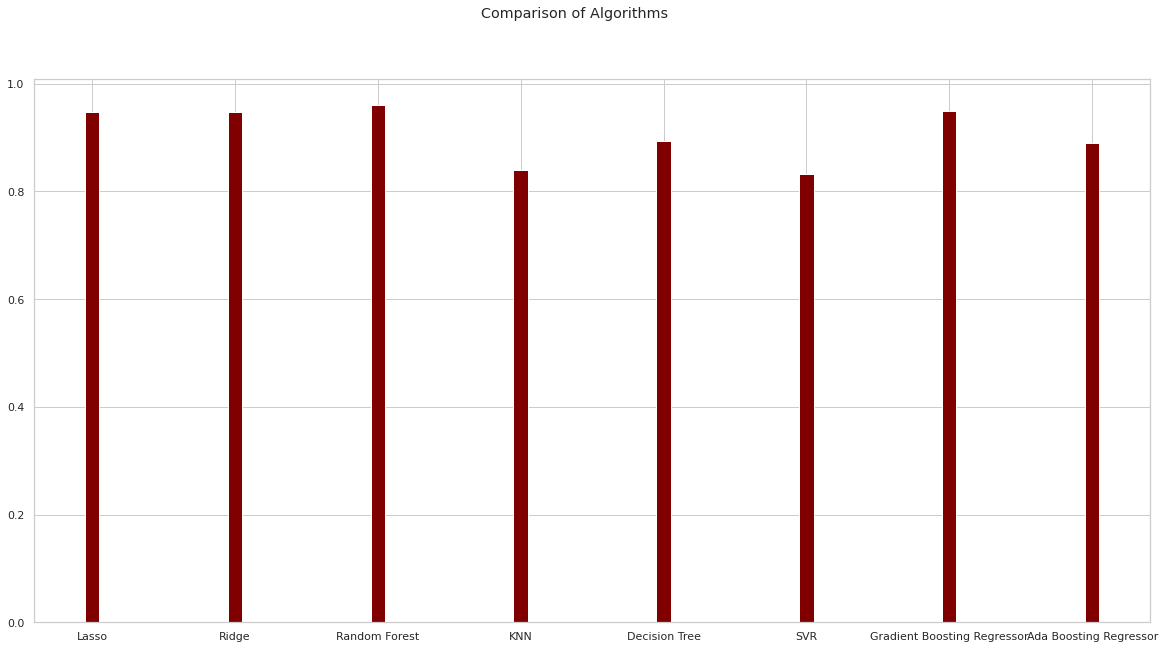

In [54]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparison of Algorithms')
cv_results = []
for i in range(len(cv_results)):
    cv_results.append(cv_results[i][1])
plt.bar(predictive_models, xyz, color ='maroon', width=0.10)
plt.show()